Project 1: Data Manipulation, Handling Missing Data, Data Visualization
1. Load the dataset file, 'titanic.csv' from the following link:
https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv
2. Find out all the feature names where Null values exist.
3. Fill the null values of the 'Age' column with the mean of the other values.
And also fill the Null values of the 'Cabin' column with 'Unknown'.
4. Plot the dataset with 2 bars; Survived, Dead.
And include Female and Male survivors' measurement in each bar.
5. Follow the step 4 and include the Survived, and Dead bars amongst the 'Pclass'.
6. Create a column named 'AgeClass' and insert values;
* 0 if age <= 16
* 1 if age <= 26
* 2 if age <= 36
* 3 if age <= 62
* 4 otherwise
7. Now drop the column 'Age'.
8. Follow step 4 and create a bar plot of Survived and Dead using the value counts amongst 'AgeClass'
groups.
Assignments
Divide your identification number with 6.
Suppose, the remainder is x. You’re assigned to complete the x
th
task.
If x is 0, then go for task-6.
1. Create a Scatter plot of Male and Female Survivors.
Display Passengers’ Age on the X-axis, and Fare on the Y-axis.
Note: Use color = ‘green’ for male and color = ‘red’ for female.


In [2]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df['Age'].fillna(df['Age'].mean(), inplace=True) 
df['Cabin'].fillna('Unknown', inplace=True)  

print(df[['Age', 'Cabin']].isnull().sum())

Age      0
Cabin    0
dtype: int64


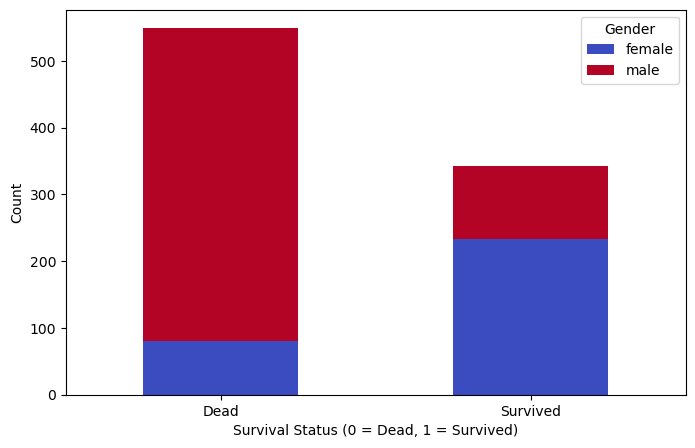

In [13]:

survival_counts = df.groupby(['Survived', 'Sex']).size().unstack()

survival_counts.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(8, 5))

plt.xlabel("Survival Status (0 = Dead, 1 = Survived)")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.xticks(ticks=[0, 1], labels=["Dead", "Survived"], rotation=0)
plt.show()


In [20]:

def classify_age(age):
    if age <= 16:
        return 0
    elif age <= 26:
        return 1
    elif age <= 36:
        return 2
    elif age <= 62:
        return 3
    else:
        return 4

df['AgeClass'] = df['Age'].apply(classify_age)



In [21]:
df[['AgeClass']]

,AgeClass
0,1
1,3
2,1
3,2
4,2
...,...
886,2
887,1
888,2
889,1


In [24]:
df.drop(columns=['Age'],inplace=True)

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,Unknown,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,Unknown,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,Unknown,S,2


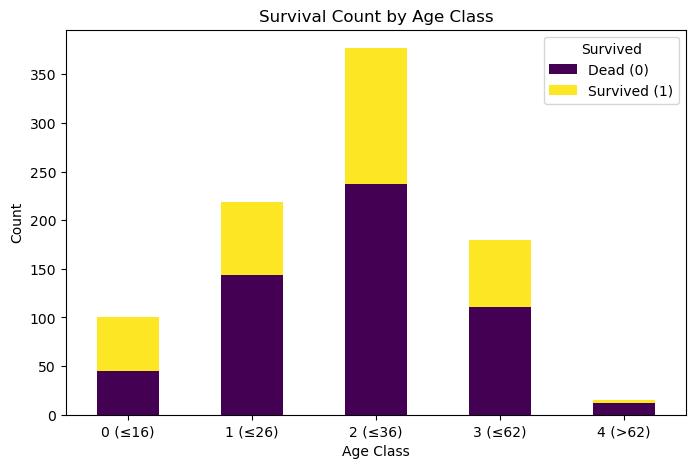

In [26]:

ageclass_counts = df.groupby(['AgeClass', 'Survived']).size().unstack()

ageclass_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8, 5))

plt.xlabel("Age Class")
plt.ylabel("Count")
plt.title("Survival Count by Age Class")
plt.legend(title="Survived", labels=["Dead (0)", "Survived (1)"])
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["0 (≤16)", "1 (≤26)", "2 (≤36)", "3 (≤62)", "4 (>62)"], rotation=0)

plt.show()


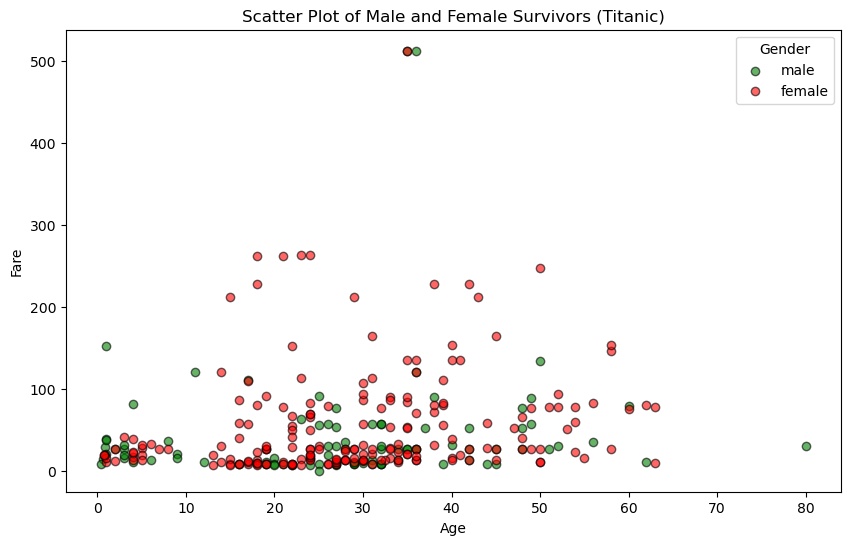

In [5]:
import matplotlib.pyplot as plt
survivors = df[df['Survived'] == 1]
colors = {'male': 'green', 'female': 'red'}
plt.figure(figsize=(10, 6))
for gender in ['male', 'female']:
    subset = survivors[survivors['Sex'] == gender]
    plt.scatter(subset['Age'], subset['Fare'], c=colors[gender], label=gender, alpha=0.6, edgecolors='black')


plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Scatter Plot of Male and Female Survivors (Titanic)")
plt.legend(title="Gender")
plt.show()
